# QTM 151 Final project

## Statistical Analysis on F1 Races

Group Members: Eric Chen, Sissi Li, Stephanie Li, Jason Zhang



## I. Introduction

Formula 1, known as F1, is the highest class of international single-seater automobile racing, where elite teams and drivers compete in a series of Grand Prix races held worldwide. It's a sport where success is determined by not only the skill of the driver, but a wide range of complex factors like car design and circuits. In this project, we aim to answer the following question:
**What are the most influential factors that determine race outcomes in Formula 1?**  This analytical question was generated based on the our curiosity about performance and for teams interested in quantative analyiss for optimizing their performance. 

Our project would dive deep into comprehensive datasets of F1 racer results. By applying statiscal modeling and data cleaning, we hope to identify patterns and key predictors for race success. We would present our findings through visualizations, concluding with insights on how data can support better performances. In this project, our team will focus on four potential factors, including **Driver Performance**, **Constructor Team Strength**, **Qualifying Position and Race Start**, and **Circuit Characrteristics**. The following sections will cover data exploration, data cleaning and sorting, visualizations, regressions,and conclusions.

## II. Data Exploration

Let's first begin by importing some important packages

In [1]:
##import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from datetime import date, time, datetime

Now the important packages have been successfully imported. We can start importing some of the data that this project would perform analysis on. For this project, we would be using datasets including circuits.csv, constructor_results.csv, constructors.csv

In [31]:
## Import Data Sets

## Results data sets
results = pd.read_csv("data_raw/results.csv")

## Drivers data sets
drivers = pd.read_csv("data_raw/drivers.csv")
drivers_standings= pd.read_csv("data_raw/driver_standings.csv")

## Constructor data sets
constructors = pd.read_csv("data_raw/constructors.csv")
constructors_results= pd.read_csv("data_raw/constructor_results.csv")
constructors_standings= pd.read_csv("data_raw/constructor_standings.csv")

## Qualifying Position and Race Start data sets
qualifying = pd.read_csv("data_raw/qualifying.csv")


circuits= pd.read_csv("data_raw/circuits.csv")
races= pd.read_csv("data_raw/races.csv")



We have successfully imported several datasets into the system, including information on constructors, constructor results, circuits, and seasons. Now, we’ll begin exploring each dataset to better understand their structure and contents. This initial exploration will involve previewing the data, checking column types and missing values, and generating basic descriptive statistics to guide further analysis.

### 1. Preview the Data

We’ll look at the first few rows to get a sense of the data format and column names:

In [32]:

# Preview datasets
print("Results Dataset Preview:")
print(results.head(), "\n")

print("Drivers Dataset Preview:")
print(drivers.head(), "\n")

print("Driver Standings Dataset Preview:")
print(drivers_standings.head(), "\n")

print("Constructors Dataset Preview:")
print(constructors.head(), "\n")

print("Constructor Results Dataset Preview:")
print(constructors_results.head(), "\n")

print("Constructor Standings Dataset Preview:")
print(constructors_standings.head(), "\n")

print("Qualifying Dataset Preview:")
print(qualifying.head(), "\n")

print("Circuits Dataset Preview:")
print(circuits.head(), "\n")

print("Races Dataset Preview:")
print(races.head(), "\n")

Results Dataset Preview:
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300      

Based on the preview of the datasets, here is a description of each dataset:

1. **Results Dataset**: Contains information about race results, including driver performance, finishing positions, and points scored in each race.

2. **Drivers Dataset**: Provides details about the drivers, such as their names, nationalities, and other personal information.

3. **Driver Standings Dataset**: Tracks the standings of drivers throughout the season, including their accumulated points and rankings.

4. **Constructors Dataset**: Includes information about the constructors (teams), such as their names and nationalities.

5. **Constructor Results Dataset**: Details the performance of constructors in individual races, including points scored and other metrics.

6. **Constructor Standings Dataset**: Tracks the standings of constructors throughout the season, including their accumulated points and rankings.

7. **Qualifying Dataset**: Contains data about qualifying sessions, including drivers' qualifying positions and lap times.

8. **Circuits Dataset**: Provides information about the circuits where races are held, including their locations and other attributes.

### 2. Check column names and data types

This helps us identify which columns might need transformation or cleaning:

In [33]:
# Check column data types for each dataset
print("Results Dataset Column Data Types:")
print(results.dtypes, "\n")

print("Drivers Dataset Column Data Types:")
print(drivers.dtypes, "\n")

print("Driver Standings Dataset Column Data Types:")
print(drivers_standings.dtypes, "\n")

print("Constructors Dataset Column Data Types:")
print(constructors.dtypes, "\n")

print("Constructor Results Dataset Column Data Types:")
print(constructors_results.dtypes, "\n")

print("Constructor Standings Dataset Column Data Types:")
print(constructors_standings.dtypes, "\n")

print("Qualifying Dataset Column Data Types:")
print(qualifying.dtypes, "\n")

print("Circuits Dataset Column Data Types:")
print(circuits.dtypes, "\n")

Results Dataset Column Data Types:
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object 

Drivers Dataset Column Data Types:
driverId        int64
driverRef      object
number         object
code           object
forename       object
surname        object
dob            object
nationality    object
url            object
dtype: object 

Driver Standings Dataset Column Data Types:
driverStandingsId      int64
raceId                 int64
driverId               int64
points               float64
position               int64
positionText          obj

1. **Results Dataset**: Contains a mix of numerical columns (e.g., points, positions) and categorical columns (e.g., driver IDs, constructor IDs). These data types indicate the dataset is primarily used for numerical analysis and relational mapping.

2. **Drivers Dataset**: Includes categorical columns such as driver names, nationalities, and IDs. These columns are useful for identifying and describing individual drivers.

3. **Driver Standings Dataset**: Primarily consists of numerical columns (e.g., points, rankings) and categorical columns (e.g., driver IDs). This dataset is structured for tracking driver performance over time.

4. **Constructors Dataset**: Contains categorical columns such as constructor names and nationalities. These columns provide descriptive information about the teams.

5. **Constructor Results Dataset**: Includes numerical columns (e.g., points scored) and categorical columns (e.g., constructor IDs). This dataset is used to analyze team performance in races.

6. **Constructor Standings Dataset**: Similar to the driver standings dataset, it contains numerical columns (e.g., points, rankings) and categorical columns (e.g., constructor IDs) for tracking team performance.

7. **Qualifying Dataset**: Contains numerical columns (e.g., qualifying positions, lap times) and categorical columns (e.g., driver IDs). This dataset is focused on pre-race performance.

8. **Circuits Dataset**: Includes categorical columns such as circuit names, locations, and IDs. These columns describe the venues where races are held.

### 3. Get basic statistics (numeric columns)
This provides a quick overview of the distribution and possible outliers:

In [34]:
# Get basic statistical summary for each dataset
print("Results Dataset Statistics:")
print(results.describe(), "\n")

print("Drivers Dataset Statistics:")
print(drivers.describe(), "\n") 

print("Driver Standings Dataset Statistics:")
print(drivers_standings.describe(), "\n")

print("Constructors Dataset Statistics:")
print(constructors.describe(), "\n")  

print("Constructor Results Dataset Statistics:")
print(constructors_results.describe(), "\n")

print("Constructor Standings Dataset Statistics:")
print(constructors_standings.describe(), "\n")

print("Qualifying Dataset Statistics:")
print(qualifying.describe(), "\n")

print("Circuits Dataset Statistics:")
print(circuits.describe(), "\n")

Results Dataset Statistics:
           resultId        raceId      driverId  constructorId          grid  \
count  25840.000000  25840.000000  25840.000000   25840.000000  25840.000000   
mean   12921.334327    531.425813    261.732082      48.628328     11.179063   
std     7460.682031    299.440908    268.623016      59.732131      7.243725   
min        1.000000      1.000000      1.000000       1.000000      0.000000   
25%     6460.750000    293.000000     56.000000       6.000000      5.000000   
50%    12920.500000    514.000000    163.000000      25.000000     11.000000   
75%    19380.250000    784.000000    360.000000      58.000000     17.000000   
max    25845.000000   1096.000000    856.000000     214.000000     34.000000   

       positionOrder        points          laps      statusId  
count   25840.000000  25840.000000  25840.000000  25840.000000  
mean       12.876006      1.877053     45.977515     17.568692  
std         7.712391      4.169849     29.808951     26.

## III. Data Manipulation & Cleaning

Now we will merge the data for each factor analysis

### Factor 1: Driver Experience

In [35]:
# Rename columns before merging
drivers_renamed = drivers.rename(columns={"number": "driver_number"})
results_renamed = results.rename(columns={"position": "results_position"})

# Merge drivers with results on driverId
drivers_results_merged = pd.merge(drivers_renamed, results_renamed, on="driverId", how="inner")

# Then merge with races on raceId to get race info
drivers_races_merged = pd.merge(drivers_results_merged, races, on="raceId", how="inner")

# Convert dob to datetime for age calculation
drivers_races_merged['dob'] = pd.to_datetime(drivers_races_merged['dob'], errors='coerce')

# Compute age at time of race
drivers_races_merged['age'] = drivers_races_merged['year'] - drivers_races_merged['dob'].dt.year

# Display the final DataFrame
print(drivers_races_merged.head())

# Data Cleaning:
# 1. Check the data type:
print(drivers_races_merged.dtypes)

# 2. Check for missing values
print(drivers_races_merged.isnull().sum()) 
drivers_races_merged_clean = drivers_races_merged.dropna(subset=['results_position'])
print(drivers_races_merged_clean.isnull().sum())

# 3. Convert and Recode Data
drivers_races_merged_clean['number'] = pd.to_numeric(drivers_races_merged_clean['number'], errors='coerce')
drivers_races_merged_clean['date'] = pd.to_datetime(drivers_races_merged_clean['date'], errors='coerce')
print(drivers_races_merged_clean['date'].dtype) 

# 4. Filtering redundant entries:
# filter duplicate driver-race Id
drivers_races_merged_clean = drivers_races_merged_clean.drop_duplicates(subset=['driverId', 'raceId'])





   driverId driverRef driver_number code forename   surname        dob  \
0         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   
1         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   
2         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   
3         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   
4         1  hamilton            44  HAM    Lewis  Hamilton 1985-01-07   

  nationality                                        url_x  resultId  ...  \
0     British  http://en.wikipedia.org/wiki/Lewis_Hamilton         1  ...   
1     British  http://en.wikipedia.org/wiki/Lewis_Hamilton        27  ...   
2     British  http://en.wikipedia.org/wiki/Lewis_Hamilton        57  ...   
3     British  http://en.wikipedia.org/wiki/Lewis_Hamilton        69  ...   
4     British  http://en.wikipedia.org/wiki/Lewis_Hamilton        90  ...   

   fp1_time  fp2_date fp2_time  fp3_date fp3_time quali_date  quali_time  \
0        \N     

In [36]:
# Add race count (experience) per driver
race_counts =drivers_races_merged_clean['driverId'].value_counts().reset_index()
race_counts.columns = ['driverId', 'race_counts']

# Merge it into the main DataFrame
drivers_races_merged_clean = pd.merge(
    drivers_races_merged_clean, race_counts, on='driverId', how='left'
)
drivers_races_merged_clean["results_position"] = pd.to_numeric(drivers_races_merged_clean["results_position"], errors="coerce")




### Factor 2: Constructor Strength

In [37]:
# Merge constructors with results on constructorId to get per-driver race points
constructors_results_merged = pd.merge(
    constructors,
    results[['raceId', 'constructorId', 'position']],
    on='constructorId',
    how='inner'
)

# Merge with races to include year information
constructors_races_data = pd.merge(
    constructors_results_merged,
    races[['raceId', 'year']],
    on='raceId',
    how='inner'
)

# Display the merged dataset
constructors_races_data.head()

# Data Cleaning:
# 1. Check the data type:
print(constructors_races_data.dtypes)

# 2. Check for missing values
constructors_races_data['position'] = constructors_races_data['position'].replace('\\N', np.nan)
constructors_races_data['position'] = pd.to_numeric(constructors_races_data['position'], errors='coerce')
constructors_races_data_cleaned = constructors_races_data[constructors_races_data['position'].notna()]

print(constructors_races_data_cleaned.isnull().sum()) 


constructorId      int64
constructorRef    object
name              object
nationality       object
url               object
raceId             int64
position          object
year               int64
dtype: object
constructorId     0
constructorRef    0
name              0
nationality       0
url               0
raceId            0
position          0
year              0
dtype: int64


### Factor 3: Circuits Characteristics

In [38]:
# Merge circuits with races on circuitId
circuits_races_merged = pd.merge(circuits, races, on="circuitId", how="inner")

# Merge the result with results on raceId
circuits_races_results_merged = pd.merge(circuits_races_merged, results, on="raceId", how="inner")

# Display the resulting dataset
circuits_races_results_merged.head()

# Data Cleaning:
# 1. Check the data type:
print(circuits_races_results_merged.dtypes)

# 2. Check for missing values
# clean the colume of position
circuits_races_results_merged['position'] = circuits_races_results_merged['position'].replace('\\N', np.nan)
circuits_races_results_merged['position'] = pd.to_numeric(circuits_races_results_merged['position'], errors='coerce')
circuits_races_results_cleaned = circuits_races_results_merged[circuits_races_results_merged['position'].notna()]
print(circuits_races_results_cleaned.isnull().sum())


# 3. Convert and Recode Data
circuits_races_results_cleaned['alt'] = pd.to_numeric(circuits_races_results_cleaned['alt'], errors='coerce')
circuits_races_results_cleaned['date'] = pd.to_datetime(circuits_races_results_cleaned['date'], errors='coerce')

# 4. Filteirng:
circuits_races_results_cleaned = circuits_races_results_cleaned.drop_duplicates(subset=['raceId', 'driverId'])


circuitId            int64
circuitRef          object
name_x              object
location            object
country             object
lat                float64
lng                float64
alt                 object
url_x               object
raceId               int64
year                 int64
round                int64
name_y              object
date                object
time_x              object
url_y               object
fp1_date            object
fp1_time            object
fp2_date            object
fp2_time            object
fp3_date            object
fp3_time            object
quali_date          object
quali_time          object
sprint_date         object
sprint_time         object
resultId             int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time_y              object
m

/var/folders/8d/dgnnsmp1505832bfb59cyc080000gn/T/ipykernel_78272/2472883188.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuits_races_results_cleaned['alt'] = pd.to_numeric(circuits_races_results_cleaned['alt'], errors='coerce')
/var/folders/8d/dgnnsmp1505832bfb59cyc080000gn/T/ipykernel_78272/2472883188.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuits_races_results_cleaned['date'] = pd.to_datetime(circuits_races_results_cleaned['date'], errors='coerce')


### Factor 4: Qualifying Performance

In [39]:
# Rename Columns Prior to Merging
# Rename both 'position' and 'number' columns in one step for each DataFrame
qualifying_renamed = qualifying.rename(columns={
    "position": "qualifying_position",
    "number": "qualifying_number"
})

results_renamed = results.rename(columns={
    "position": "results_position",
    "number": "results_number"
})


# Merge qualifying with results on driverId and raceId
qualifying_results_merged = pd.merge(qualifying_renamed, results_renamed, on=["driverId", "raceId"], how="inner")

# Optionally merge with races to include time-series information (e.g., year)
qualifying_results_races_merged = pd.merge(qualifying_results_merged, races[['raceId', 'year']], on="raceId", how="inner")

# Display the resulting dataset
qualifying_results_races_merged.head()

# Data Cleaning:
# 1. Check the data type:
print(qualifying_results_races_merged.dtypes)

# 2. Check for missing values
print(qualifying_results_races_merged.isnull().sum()) 

for col in ['q1', 'q2', 'q3']:
    qualifying_results_races_merged[col] = qualifying_results_races_merged[col].replace('\\N', np.nan)
qualifying_results_races_merged_clean = qualifying_results_races_merged.dropna(subset=['q1', 'q2', 'q3'])


# 3. Convert Data Type
qualifying_results_races_merged_clean['results_number'] = pd.to_numeric(qualifying_results_races_merged_clean['results_number'], errors='coerce')
qualifying_results_races_merged_clean['results_position'] = pd.to_numeric(qualifying_results_races_merged_clean['results_position'], errors='coerce')
qualifying_results_races_merged_clean['rank'] = pd.to_numeric(qualifying_results_races_merged_clean['rank'], errors='coerce')
qualifying_results_races_merged_clean['fastestLap'] = pd.to_numeric(qualifying_results_races_merged_clean['fastestLap'], errors='coerce')



qualifyId                int64
raceId                   int64
driverId                 int64
constructorId_x          int64
qualifying_number        int64
qualifying_position      int64
q1                      object
q2                      object
q3                      object
resultId                 int64
constructorId_y          int64
results_number          object
grid                     int64
results_position        object
positionText            object
positionOrder            int64
points                 float64
laps                     int64
time                    object
milliseconds            object
fastestLap              object
rank                    object
fastestLapTime          object
fastestLapSpeed         object
statusId                 int64
year                     int64
dtype: object
qualifyId                0
raceId                   0
driverId                 0
constructorId_x          0
qualifying_number        0
qualifying_position      0
q1                

/var/folders/8d/dgnnsmp1505832bfb59cyc080000gn/T/ipykernel_78272/3333290595.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_results_races_merged_clean['results_number'] = pd.to_numeric(qualifying_results_races_merged_clean['results_number'], errors='coerce')
/var/folders/8d/dgnnsmp1505832bfb59cyc080000gn/T/ipykernel_78272/3333290595.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_results_races_merged_clean['results_position'] = pd.to_numeric(qualifying_results_races_merged_cl

## IV. Data Analysis

### Factor 1 -- Driver Experience

#### Age vs. Result Position 

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     346.8
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.52e-76
Time:                        21:25:58   Log-Likelihood:                -44469.
No. Observations:               14934   AIC:                         8.894e+04
Df Residuals:                   14932   BIC:                         8.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0160      0.222     54.178      0.0

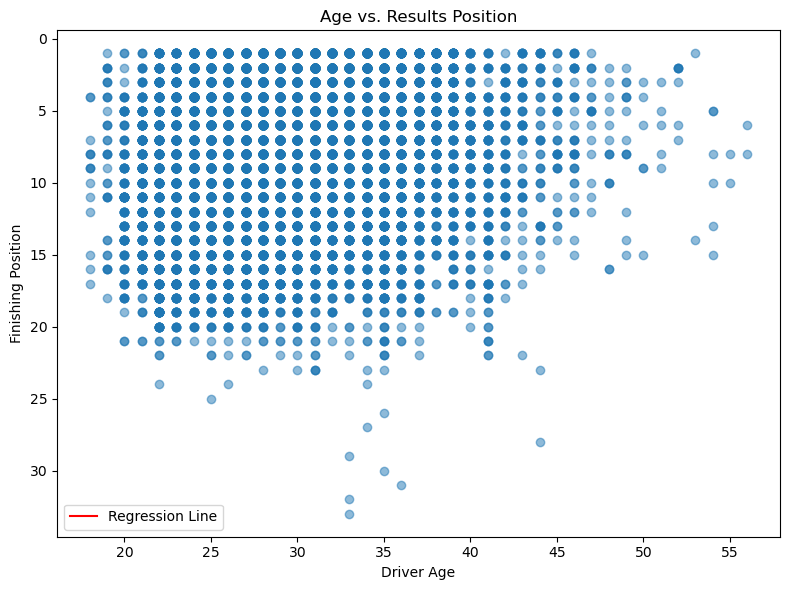

In [40]:
#OLS regression
model_age = smf.ols('results_position ~ age', data=drivers_races_merged_clean).fit()
print(model_age.summary())

# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(drivers_races_merged_clean["age"], drivers_races_merged_clean["results_position"], alpha=0.5)

# Calculate regression line
x = drivers_races_merged_clean["age"]
y = drivers_races_merged_clean["results_position"]
m, b = np.polyfit(x, y, 1)

# Plot regression line
plt.plot(x, m * x + b, color="red", label="Regression Line")

# Final formatting
plt.title("Age vs. Results Position")
plt.xlabel("Driver Age")
plt.ylabel("Finishing Position")
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()


### Experience (Race Count) vs. Result Position

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1454.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          9.79e-304
Time:                        21:25:58   Log-Likelihood:                -43946.
No. Observations:               14934   AIC:                         8.790e+04
Df Residuals:                   14932   BIC:                         8.791e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.0793      0.067    149.765      

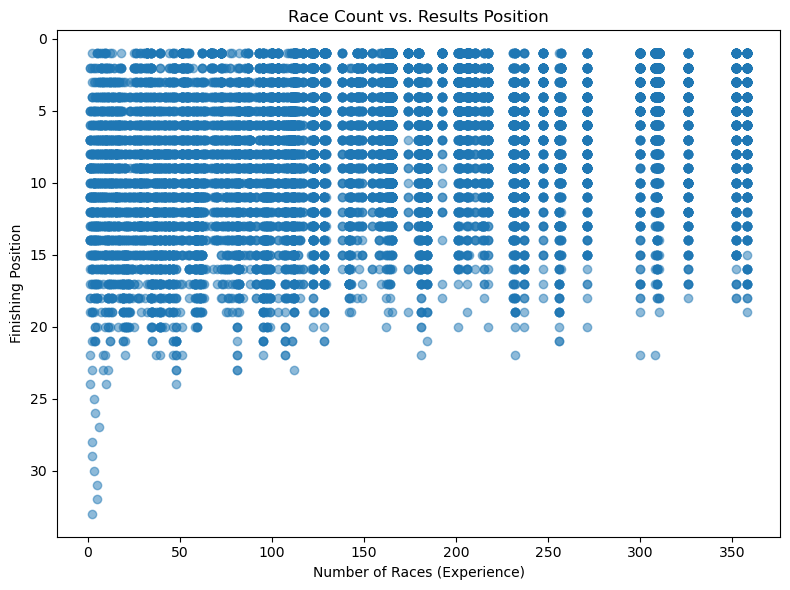

In [41]:
# OLS for Experience only (race_count)
model_experience = smf.ols('results_position ~ race_counts', data=drivers_races_merged_clean).fit()
print(model_experience.summary())

# OLS for age and race_count 
model_age_experience = smf.ols('results_position ~ age + race_counts', data=drivers_races_merged_clean).fit()
print(model_age_experience.summary())

#ScatterPlot & Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(drivers_races_merged_clean["race_counts"], drivers_races_merged_clean["results_position"], alpha=0.5)

# Fit regression line
m, b = np.polyfit(drivers_races_merged_clean["race_counts"], drivers_races_merged_clean["results_position"], 1)
plt.plot(drivers_races_merged_clean["race_counts"], m * drivers_races_merged_clean["race_counts"] + b, color="blue")

plt.title("Race Count vs. Results Position")
plt.xlabel("Number of Races (Experience)")
plt.ylabel("Finishing Position")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


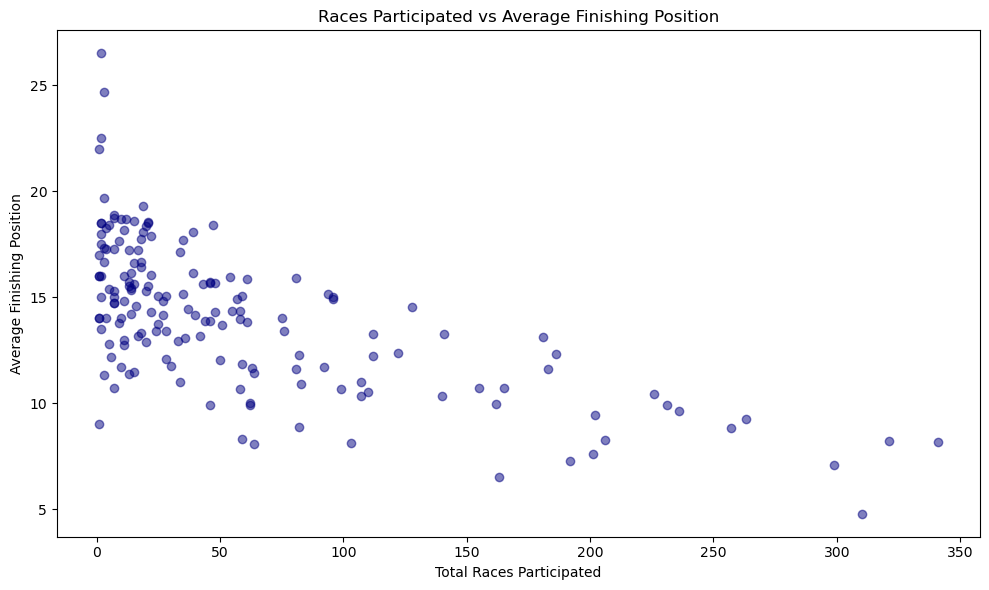

In [42]:
# Step 1: Group by driver and compute race count and average finishing position
driver_stats = merged.groupby('driverId').agg({
    'raceId': 'count',                      # Total races participated
    'positionOrder': 'mean'                # Average race result (finishing position)
}).reset_index()

# Rename columns for clarity
driver_stats = driver_stats.rename(columns={
    'raceId': 'race_count',
    'positionOrder': 'avg_finish_position'
})

# Step 2: Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(driver_stats['race_count'], driver_stats['avg_finish_position'], alpha=0.5, color='navy')
plt.xlabel("Total Races Participated")
plt.ylabel("Average Finishing Position")
plt.title("Races Participated vs Average Finishing Position")
plt.tight_layout()
plt.show()

The scatter plot shows a negative correlation between total races participated and average finishing position, suggesting that more experienced drivers tend to place higher in races. This trend indicates that race experience may play a significant role in improving overall performance in Formula 1.

#### Driver's Seaon Win vs. Result Position

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2507.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:25:58   Log-Likelihood:                -43481.
No. Observations:               14934   AIC:                         8.697e+04
Df Residuals:                   14932   BIC:                         8.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6075      0.039    222.383      0.0

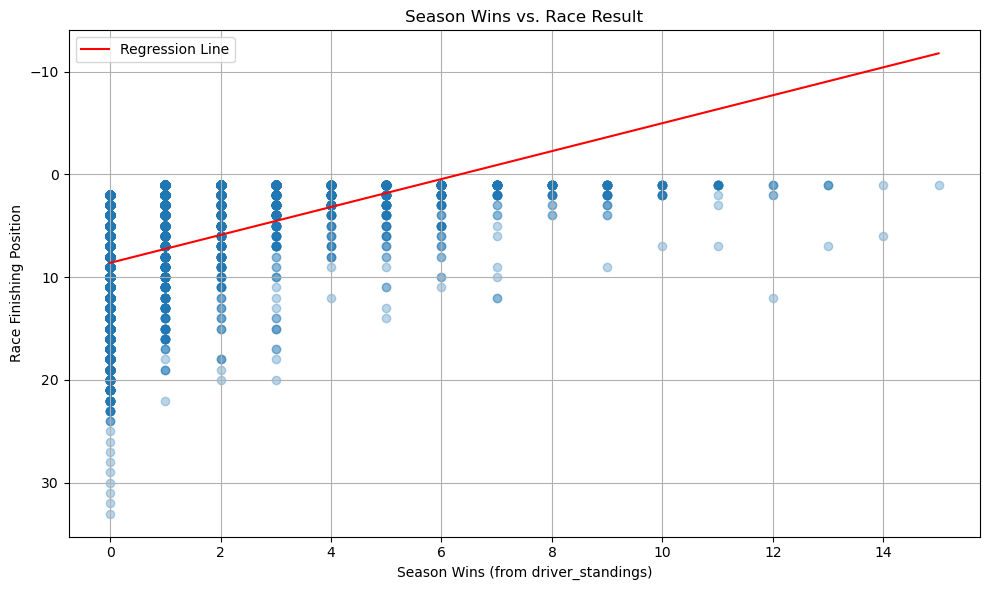

In [43]:
# Step 1: Merge in the 'wins' column from driver_standings
standings_trimmed = drivers_standings[['raceId', 'driverId', 'wins']]

results_with_wins = pd.merge(
    drivers_races_merged_clean,
    standings_trimmed,
    on=['raceId', 'driverId'],
    how='left'
)

# Step 2: Drop rows with missing results_position or wins
results_with_wins = results_with_wins.dropna(subset=['results_position', 'wins'])

# Step 3: Convert wins to numeric if needed
results_with_wins['wins'] = pd.to_numeric(results_with_wins['wins'], errors='coerce')

# Step 4: Run OLS regression
model_wins = smf.ols('results_position ~ wins', data=results_with_wins).fit()
print(model_wins.summary())

#Plot
plt.figure(figsize=(10, 6))
plt.scatter(results_with_wins['wins'], results_with_wins['results_position'], alpha=0.3)

# Regression line
x_vals = np.linspace(results_with_wins['wins'].min(), results_with_wins['wins'].max(), 100)
y_vals = model_wins.params.Intercept + model_wins.params.wins * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.xlabel("Season Wins (from driver_standings)")
plt.ylabel("Race Finishing Position")
plt.title("Season Wins vs. Race Result")
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Factor 2 -- Driver Nationality

In [44]:
# Make sure 'nationality' is categorical
drivers_races_merged_clean['nationality'] = drivers_races_merged_clean['nationality'].astype('category')

# Run the regression
model_nationality = smf.ols('results_position ~ C(nationality)', data=drivers_races_merged_clean).fit()
print(model_nationality.summary())

# Group by nationality and convert result to list
nationality_groups = drivers_races_merged_clean.groupby("nationality")["results_position"].apply(list)

# Sort nationalities by average performance to make plot easier to read (optional)
nationality_means = nationality_groups.apply(lambda x: sum(x)/len(x))
sorted_nationalities = nationality_means.sort_values().index
sorted_data = [nationality_groups[nat] for nat in sorted_nationalities]




                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     33.70
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          5.86e-245
Time:                        21:25:59   Log-Likelihood:                -43993.
No. Observations:               14934   AIC:                         8.807e+04
Df Residuals:                   14893   BIC:                         8.838e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

/var/folders/8d/dgnnsmp1505832bfb59cyc080000gn/T/ipykernel_78272/3987596355.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nationality_groups = drivers_races_merged_clean.groupby("nationality")["results_position"].apply(list)


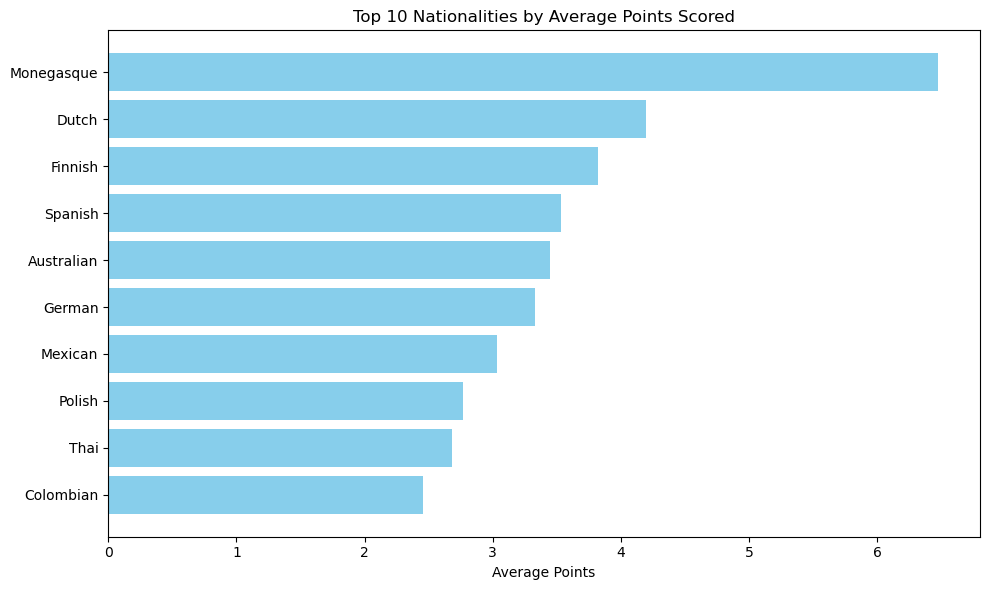

In [45]:
# Merge results with drivers and races
merged = results.merge(drivers, on='driverId').merge(races, on='raceId')

# Compute average points by nationality
avg_points = merged.groupby('nationality')['points'].mean().sort_values(ascending=False).head(10)

# Plot Bar Graph
plt.figure(figsize=(10, 6))
plt.barh(avg_points.index, avg_points.values, color='skyblue')
plt.xlabel("Average Points")
plt.title("Top 10 Nationalities by Average Points Scored")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


This bar chart shows the top 10 nationalities in terms of average points scored per race. This helps us understand that Monegasque, Dtuch, and Finnish drivers tend to score the highest points. 

## Factor 3 -- Constructor

### 1) Constructor Vs. Result

In [46]:
# Ensure the dependent variable is numeric
constructors_races_data_cleaned["position"] = pd.to_numeric(
    constructors_races_data_cleaned["position"], errors="coerce"
)

# Convert constructor name to categorical if it's not already
constructors_races_data_cleaned["name"] = constructors_races_data_cleaned["name"].astype("category")

# Run regression: constructor name as categorical predictor
model_constructor_name = smf.ols(
    "position ~ C(name)", data=constructors_races_data_cleaned
).fit()

# Display results
print(model_constructor_name.summary())


/var/folders/8d/dgnnsmp1505832bfb59cyc080000gn/T/ipykernel_78272/1611896211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constructors_races_data_cleaned["position"] = pd.to_numeric(
/var/folders/8d/dgnnsmp1505832bfb59cyc080000gn/T/ipykernel_78272/1611896211.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constructors_races_data_cleaned["name"] = constructors_races_data_cleaned["name"].astype("category")


                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     47.98
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:25:59   Log-Likelihood:                -41672.
No. Observations:               14989   AIC:                         8.367e+04
Df Residuals:                   14828   BIC:                         8.489e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


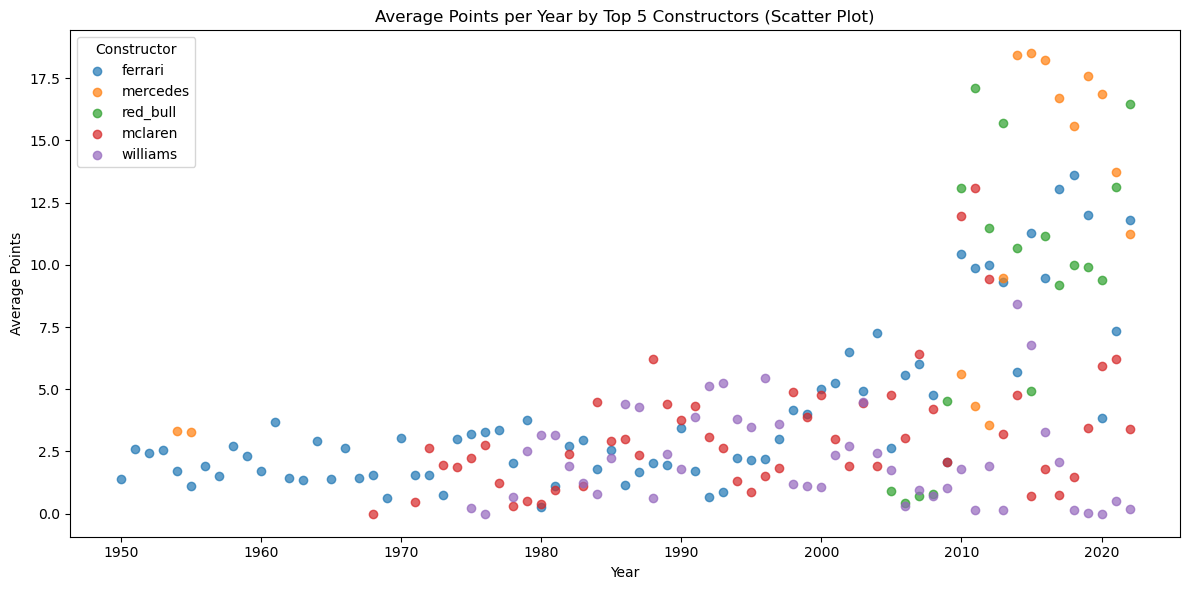

In [47]:
# Merge the necessary tables
merged = results.merge(drivers, on='driverId') \
                .merge(races, on='raceId') \
                .merge(constructors, on='constructorId')

# Use constructorRef instead of name
top_constructors = merged.groupby('constructorRef')['points'].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter for only those top 5 constructors
filtered = merged[merged['constructorRef'].isin(top_constructors)]

# Group by year and constructorRef to calculate average points per year
grouped = filtered.groupby(['year', 'constructorRef'])['points'].mean().reset_index()

# Create scatter plot
plt.figure(figsize=(12, 6))
for constructor in top_constructors:
    constructor_data = grouped[grouped['constructorRef'] == constructor]
    plt.scatter(constructor_data['year'], constructor_data['points'], label=constructor, alpha=0.7)

# Add labels and title
plt.title("Average Points per Year by Top 5 Constructors (Scatter Plot)")
plt.xlabel("Year")
plt.ylabel("Average Points")
plt.legend(title="Constructor")
plt.tight_layout()
plt.show()


Among the top 5 contructors, we observe that constructor red bull and mercedes have performed quite well based on the average points in the 2010-2020 year range while constructor have shown consistent average scores around the 2.5 to 5 region. Contructor Mclaren and ferrari, on the other hand, seemed to have an overall increase in average points scored per year and 

### 2) Constructor Nationality VS. Results

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     160.9
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:26:00   Log-Likelihood:                -43315.
No. Observations:               14934   AIC:                         8.667e+04
Df Residuals:                   14915   BIC:                         8.681e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

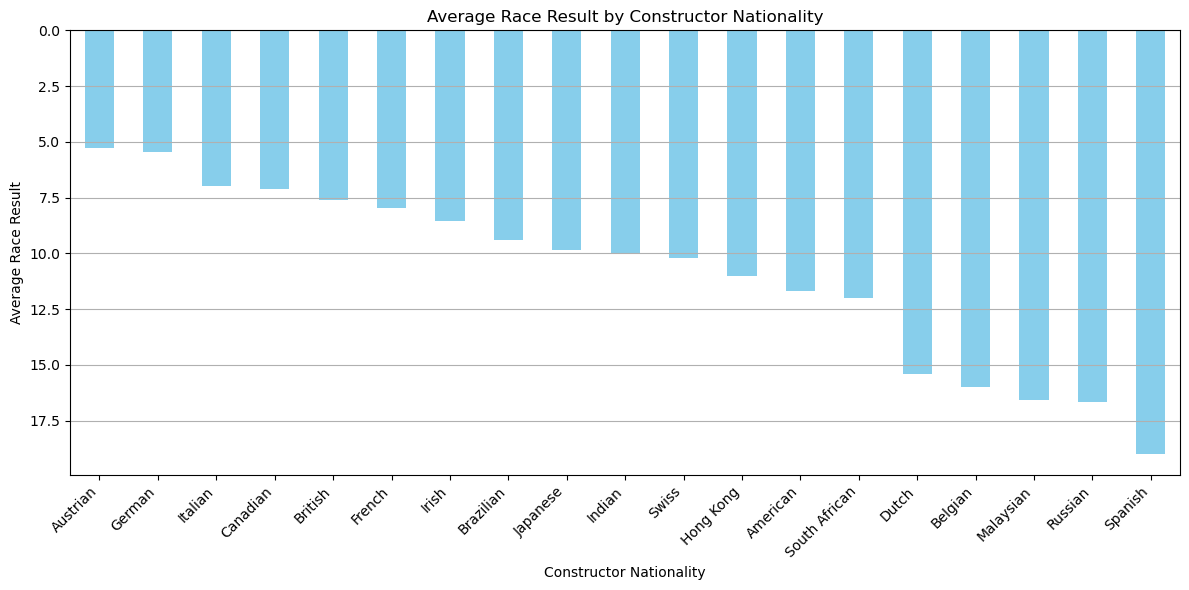

In [48]:
# Step 1: Merge in constructor nationality
constructors_nationality = constructors[['constructorId', 'nationality']].rename(columns={'nationality': 'constructor_nationality'})
results_with_nationality = pd.merge(drivers_races_merged_clean, constructors_nationality, on='constructorId', how='left')

# Step 2: Drop missing results
results_with_nationality = results_with_nationality.dropna(subset=['results_position'])

# Step 3: Run OLS regression
model_nat = smf.ols('results_position ~ C(constructor_nationality)', data=results_with_nationality).fit()

# Step 4: Print model summary
print(model_nat.summary())

# Step 1: Merge constructor nationality into your cleaned dataset
constructors_nationality = constructors[['constructorId', 'nationality']].rename(columns={'nationality': 'constructor_nationality'})
results_with_nationality = pd.merge(drivers_races_merged_clean, constructors_nationality, on='constructorId', how='left')

# Step 2: Drop missing values
results_with_nationality = results_with_nationality.dropna(subset=['results_position'])

# Step 3: Group and calculate mean result per nationality
avg_results_by_nat = results_with_nationality.groupby('constructor_nationality')['results_position'].mean().sort_values()

# Step 4: Plot
plt.figure(figsize=(12, 6))
avg_results_by_nat.plot(kind='bar', color='skyblue')
plt.ylabel("Average Race Result")
plt.xlabel("Constructor Nationality")
plt.title("Average Race Result by Constructor Nationality")
plt.gca().invert_yaxis()  # Lower is better in F1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


## Factor 4 -- Circuits & Results

### 1) Altitude & Result Regression -- (Not significant) Altitude should be a constant

In [49]:
circuits_races_results_cleaned["position"] = pd.to_numeric(
    circuits_races_results_cleaned["position"], errors="coerce"
)

model_circuit_alt = smf.ols(
    "position ~ alt", data=circuits_races_results_cleaned
).fit()

print(model_circuit_alt.summary())




                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.849
Date:                Thu, 24 Apr 2025   Prob (F-statistic):             0.0915
Time:                        21:26:00   Log-Likelihood:                -44659.
No. Observations:               14944   AIC:                         8.932e+04
Df Residuals:                   14942   BIC:                         8.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9858      0.047    168.340      0.0

### 2) Altitude & Variation in finishing time

In [50]:
# Clean the 'milliseconds' and 'alt' columns
circuits_races_results_cleaned["milliseconds"] = pd.to_numeric(
    circuits_races_results_cleaned["milliseconds"].replace("\\N", np.nan),
    errors="coerce"
)

circuits_races_results_cleaned["alt"] = pd.to_numeric(
    circuits_races_results_cleaned["alt"].replace("\\N", np.nan),
    errors="coerce"
)

# Aggregate: std and mean of milliseconds, and altitude
circuit_time_stats = circuits_races_results_cleaned.groupby("circuitId").agg(
    std_time=("milliseconds", "std"),
    mean_time=("milliseconds", "mean"),
    mean_altitude=("alt", "first")
).reset_index()

# Regression 1: Does altitude predict variability (std) in finish time?
model_std = smf.ols("std_time ~ mean_altitude", data=circuit_time_stats).fit()
print("⛰️ Altitude predicting std of finish time:")
print(model_std.summary())

# Regression 2: Does altitude predict average (mean) finish time?
model_mean = smf.ols("mean_time ~ mean_altitude", data=circuit_time_stats).fit()
print("\n⛰️ Altitude predicting mean finish time:")
print(model_mean.summary())


⛰️ Altitude predicting std of finish time:
                            OLS Regression Results                            
Dep. Variable:               std_time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.02573
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.873
Time:                        21:26:00   Log-Likelihood:                -1087.3
No. Observations:                  73   AIC:                             2179.
Df Residuals:                      71   BIC:                             2183.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Int

## Qualifying Position & Results

                            OLS Regression Results                            
Dep. Variable:       results_position   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     1367.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):          3.54e-243
Time:                        21:26:00   Log-Likelihood:                -7126.0
No. Observations:                2747   AIC:                         1.426e+04
Df Residuals:                    2745   BIC:                         1.427e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5351    

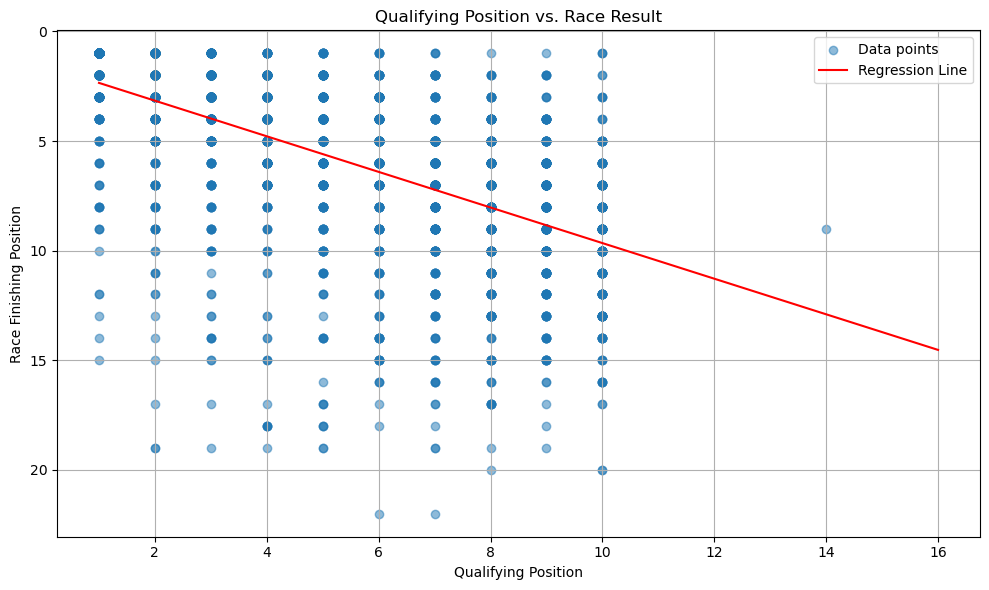

In [51]:
# Run OLS regression
model_qualifying = smf.ols('results_position ~ qualifying_position', data=qualifying_results_races_merged_clean).fit()

# Show regression summary
print(model_qualifying.summary())

# Scatterplot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(
    qualifying_results_races_merged_clean['qualifying_position'],
    qualifying_results_races_merged_clean['results_position'],
    alpha=0.5, label='Data points'
)

# Regression line
x_vals = np.linspace(
    qualifying_results_races_merged_clean['qualifying_position'].min(),
    qualifying_results_races_merged_clean['qualifying_position'].max(), 100
)
y_vals = model_qualifying.params.Intercept + model_qualifying.params.qualifying_position * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Labels and formatting
plt.xlabel("Qualifying Position")
plt.ylabel("Race Finishing Position")
plt.title("Qualifying Position vs. Race Result")
plt.gca().invert_yaxis()  # Lower position = better
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## V. Conclusion